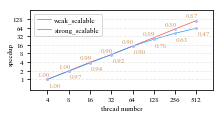

In [2]:
#! /usr/bin/env python# -*- coding: utf-8 -*-
import sys 
reload(sys) 
sys.setdefaultencoding('utf8')
"""
强弱扩展性
Author：shaomingshan
"""

import matplotlib.pyplot as plt
import numpy as np


margin_top = 1.2
margin_right = 0.8
# margin_bottom = 0.55
margin_bottom = 1.2
width, height = 3.3, 1.65  # inch
title = u''
xlabel = u'thread number'
ylabel = u'speedup'
text_size = 7
# point_size = 5
point_size = 3
# linewidth = 0.8
linewidth = 0.7
legend1 = 'strong_scalable'
legend2 = 'weak_scalable'
# color1 = '#4dd2ff'
# color2 = '#4dff88'
point_color1 = point_color2 = '#b3b3ff'
# point_color1 = point_color2 = '#ccccff'
# text_color1 = text_color2 = '#8484ae'
# text_color1 = text_color2 = '#84aeae'
text_color1 = text_color2 = '#cd9965'
grid_color = '#d9d9d9'

# color1 = '#66c2ff'
# color2 = '#ff9999'
color1 = '#1a9fff'
color2 = '#ff4d4d'

# 1536K
processes1 = [4, 8, 16, 32, 64, 128, 256, 512]
time1 = [81.505, 42.123, 21.701, 11.055, 5.642, 3.268, 2.019, 1.343]
speedup1 = [0] * len(time1)
speedup_map1 = [0] * len(speedup1)
processes_map1 = [0] * len(processes1)
standard1 = [1, 2, 4, 8, 16, 32, 64, 128]
percent1 = [0] * len(standard1)

processes2 = [4, 8, 16, 32, 64, 128, 256, 512]
time2 = [1.485, 1.490, 1.506, 1.648, 1.656, 1.670, 1.676, 1.701]
times2 = [1, 2, 4, 8, 16, 32, 64, 128]
speedup2 = [0] * len(time2)
speedup_map2 = [0] * len(speedup2)
processes_map2 = [0] * len(processes2)
standard2 = [1, 2, 4, 8, 16, 32, 64, 128]
percent2 = [0] * len(standard2)


def get_speedup2(my_time, my_times):
    my_speedup = [0] * len(my_time)
    for i in range(len(my_time)):
        my_speedup[i] = my_times[i] * my_time[0] / my_time[i]
    return my_speedup


def get_speedup(my_time):
    my_speedup = [0] * len(my_time)
    for i in range(len(my_time)):
        my_speedup[i] = my_time[0] / my_time[i]
    return my_speedup


def log2(my_speedup):
    return np.log2(my_speedup)


def get_percent(my_speedup, my_standard):
    result = [0] * len(my_speedup)
    for i in range(len(my_speedup)):
        result[i] = my_speedup[i] / my_standard[i]
    return result


def get_max(data):
    max_num = float('-inf')
    for i in data:
        max_num = i if i > max_num else max_num
    return max_num


def get_min(data):
    min_num = float('inf')
    for i in data:
        min_num = i if i < min_num else min_num
    return min_num


def draw(save_path):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    plt.figure().set_size_inches(width, height)
    plt.subplots_adjust(left=0.13, bottom=0.21, hspace=0)

    # 弱扩展性
    plt.plot(processes_map2, speedup_map2, color=color2, label=legend2, zorder=1, lw=linewidth)
    plt.scatter(processes_map2, speedup_map2, color=point_color2, s=point_size, zorder=2)
    for i in range(len(percent2)):
        plt.annotate('%.2f' % percent2[i], xy=(processes_map2[i], speedup_map2[i]),
                     xytext=(processes_map2[i] - 0.5, speedup_map2[i] + 0.3),
                     color=text_color2, fontsize=text_size, zorder=3)

    # 强扩展性
    plt.plot(processes_map1, speedup_map1, color=color1, label=legend1, zorder=1, lw=linewidth)
    plt.scatter(processes_map1, speedup_map1, color=point_color1, s=point_size, zorder=2)
    for i in range(len(percent1)):
        plt.annotate('%.2f' % percent1[i], xy=(processes_map1[i], speedup_map1[i]),
                     xytext=(processes_map1[i] + 0.05, speedup_map1[i] - 0.9),
                     color=text_color1, fontsize=text_size, zorder=3)

    plt.xticks([2, 3, 4, 5, 6, 7, 8, 9], [4, 8, 16, 32, 64, 128, 256, 512])
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [1, 2, 4, 8, 16, 32, 64, 128])
    plt.xlim(get_min(processes_map2) - margin_right, get_max(processes_map2) + margin_right)
    plt.ylim(get_min(speedup_map2) - margin_bottom, get_max(speedup_map2) + margin_top)
    plt.tick_params(labelsize=text_size)

    plt.title(title)
    plt.legend(loc='upper left', fontsize=text_size,
               borderpad=0.4, borderaxespad=0.5, handletextpad=0.5)
    plt.grid(axis='y', linestyle='--', c=grid_color, alpha=0.6)
    # xy label
    plt.text((get_max(processes_map1) + margin_right + get_min(processes_map1) - margin_right) / 2,
             get_min(speedup_map1) - 3.4,
             xlabel, ha='center', va='center', fontsize=text_size)
    plt.text(get_min(processes_map1) - 1.75,
             (get_max(speedup_map1) + margin_top + get_min(speedup_map1) - margin_bottom) / 2,
             ylabel, ha='center', va='center', fontsize=text_size, rotation=90)

    plt.savefig(save_path)
    plt.show()


if __name__ == '__main__':
    speedup1 = get_speedup(time1)
    print(speedup1)
    speedup_map1 = log2(speedup1)
    processes_map1 = log2(processes1)
    percent1 = get_percent(speedup1, standard1)
    print(percent1)

    speedup2 = get_speedup2(time2, times2)
    print(speedup2)
    speedup_map2 = log2(speedup2)
    processes_map2 = log2(processes2)
    percent2 = get_percent(speedup2, standard2)
    print(percent2)

    file = 'scalable.pdf'
    draw(file)
